In [1]:
import pickle

import numpy as np
import seaborn as sns
import pandas as pd
from pylab import rcParams

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

parsed_logs_folder = 'Enron/parsing/'
social_graph = pickle.load(open(parsed_logs_folder + "social.pkl", "rb"))
emails_per_num_of_recipients = pickle.load(open(parsed_logs_folder + "recipients.pkl", "rb"))

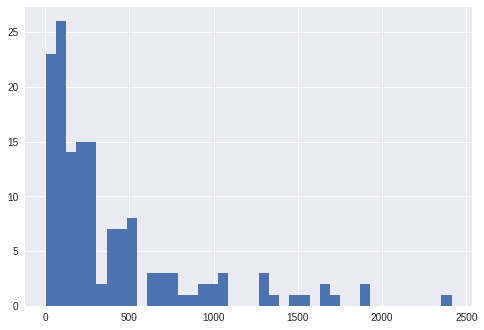

In [2]:
data = [info["num_of_friends"] for info in social_graph.values()]
plt.hist(data, bins=40)
plt.show()

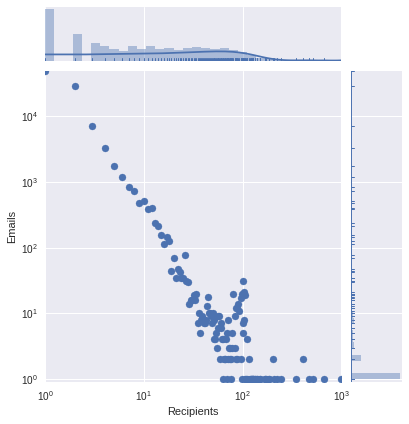

In [3]:
x, y = zip(*sorted(emails_per_num_of_recipients.items(), key=lambda t: t[0]))
data = pd.DataFrame({'Recipients': x, 'Emails': y})

logbins=np.logspace(0,np.log(10000), 100)

g = sns.JointGrid('Recipients', 'Emails', data,xlim=[1, max(data['Recipients'])],ylim=[0.9, max(data['Emails'])])
g.plot_joint(plt.scatter)
g.plot_marginals(sns.distplot, rug=True, bins=logbins)

ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')
plt.show()